# <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Support Vector Machines (SVM) Classification: Mouse Viral Study</p>


<div class="alert alert-block alert-info alert">

### <span style="color:#bf2e98">What are SVMs?
* A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.
* SVMs are commonly used within classification problems. They distinguish between two classes by **finding the optimal hyperplane that maximizes the margin between the closest data points of opposite classes.** The number of features in the input data determine if the hyperplane is a line in a 2-D space or a plane in a n-dimensional space. Since multiple hyperplanes can be found to differentiate classes, maximizing the margin between points enables the algorithm to find the best decision boundary between classes. This, in turn, enables it to generalize well to new data and make accurate classification predictions. The lines that are adjacent to the optimal hyperplane are known as support vectors as these vectors run through the data points that determine the maximal margin.
* The SVM algorithm is widely used in machine learning as it can handle **both linear and nonlinear classification** tasks. However, when the data is not linearly separable, kernel functions are used to transform the data higher-dimensional space to enable linear separation. This application of kernel functions can be known as the **kernel trick**, and the choice of kernel function, such as linear kernels, polynomial kernels, radial basis function (RBF) kernels, or sigmoid kernels, depends on data characteristics and the specific use case.

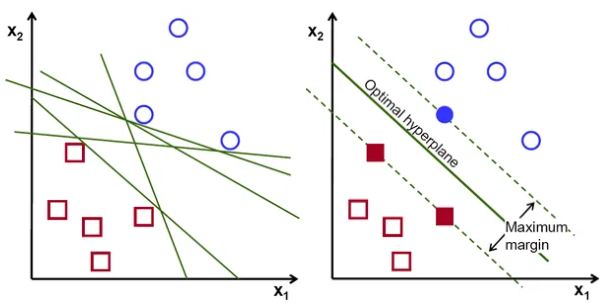

**Hyperplane:** Hyperplane is the decision boundary that is used to separate the data points of different classes in a feature space. In the case of linear classifications, it will be a linear equation i.e. wx+bb = 0.

**Support Vectors:** Support vectors are the closest data points to the hyperplane, which makes a critical role in deciding the hyperplane and margin.

**Margin:** Margin is the distance between the support vector and hyperplane. The main objective of the support vector machine algorithm is to maximize the margin.  The wider margin indicates better classification performance.

**Kernel:** Kernel is the mathematical function, which is used in SVM to map the original input data points into high-dimensional feature spaces, so, that the hyperplane can be easily found out even if the data points are not linearly separable in the original input space. Some of the common kernel functions are linear, polynomial, radial basis function(RBF), and sigmoid.

**Hard Margin:** The maximum-margin hyperplane or the hard margin hyperplane is a hyperplane that properly separates the data points of different categories without any misclassifications.

**Soft Margin:** When the data is not perfectly separable or contains outliers, SVM permits a soft margin technique. Each data point has a slack variable introduced by the soft-margin SVM formulation, which softens the strict margin requirement and permits certain misclassifications or violations (bias-variance trade-off). It discovers a compromise between increasing the margin and reducing violations. We can use cross validation to determine the optimal size of the margins.

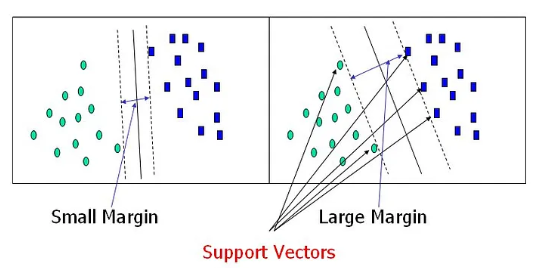
</div>

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

In [2]:
df = pd.read_csv("mouse_viral_study.csv")

In [3]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Med_1_mL       400 non-null    float64
 1   Med_2_mL       400 non-null    float64
 2   Virus Present  400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

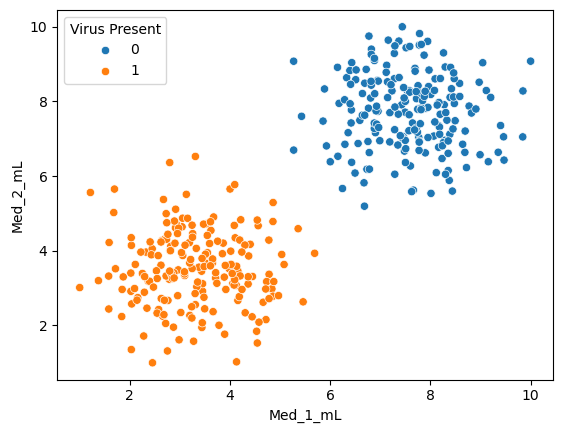

In [6]:
sns.scatterplot(df, x="Med_1_mL", y="Med_2_mL", hue="Virus Present" )

## Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

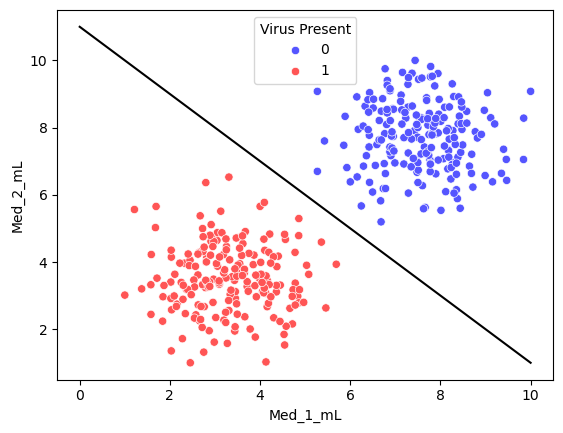

In [7]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)

# create a separating hyperplane ( a line in 2D)

x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

## Support Vector Machine (SVM) - Classification

**NOTE:** For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now.

In [9]:
from sklearn.svm import SVC

In [13]:
# help(SVC)

"""
class SVC(sklearn.svm._base.BaseSVC)
SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, 
     cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', 
         break_ties=False, random_state=None)
         
    ---------------
    
C : float, default=1.0
     Regularization parameter. The strength of the regularization is
      inversely proportional to C. Must be strictly positive. The penalty
      is a squared l2 penalty. 
  
kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'
      Specifies the kernel type to be used in the algorithm. If
      none is given, 'rbf' will be used. If a callable is given it is used to
      pre-compute the kernel matrix from data matrices; that matrix should be
      an array of shape ``(n_samples, n_samples)``.
  
degree : int, default=3
      Degree of the polynomial kernel function ('poly').
      Must be non-negative. Ignored by all other kernels.
  
gamma : {'scale', 'auto'} or float, default='scale', Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
  
      - if ``gamma='scale'`` (default) is passed then it uses
        1 / (n_features * X.var()) as value of gamma,
      - if 'auto', uses 1 / n_features
      - if float, must be non-negative.
 
max_iter : int, default=-1, Hard limit on iterations within solver, or -1 for no limit.
 
 """

"\nclass SVC(sklearn.svm._base.BaseSVC)\nSVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, \n     cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', \n         break_ties=False, random_state=None)\n         \n    ---------------\n    \nC : float, default=1.0\n     Regularization parameter. The strength of the regularization is\n      inversely proportional to C. Must be strictly positive. The penalty\n      is a squared l2 penalty. \n  \nkernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable,          default='rbf'\n      Specifies the kernel type to be used in the algorithm. If\n      none is given, 'rbf' will be used. If a callable is given it is used to\n      pre-compute the kernel matrix from data matrices; that matrix should be\n      an array of shape ``(n_samples, n_samples)``.\n  \ndegree : int, default=3\n      Degree of the polynomial kernel function ('pol

In [14]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [15]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [16]:
# This is imported from the supplemental ".py file"
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html

from svm_margin_plot import plot_svm_boundary

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


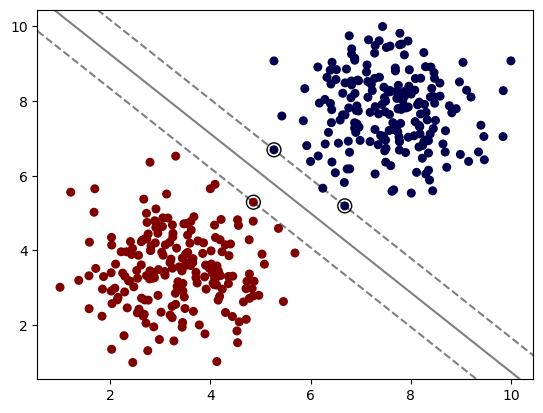

In [17]:
plot_svm_boundary(model,X,y)

## <span style=" color:#e32067">Hyper Parameters
</span>



<div class="alert alert-block alert-success">
    
### <span style=" color:#eb346e">1. C
Regularization parameter. The strength of the regularization is **inversely proportional** to C. So, the small amount of C allows more points within the margin, whereas C parameter with high value high value allows less points. In other words, as the C value approaches zero, more points appear within the margin.
</span>

In [18]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


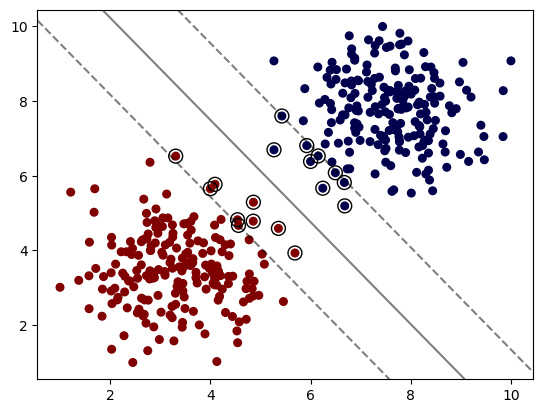

In [19]:
plot_svm_boundary(model,X,y)

Compare the number of points in two figures above. In the first figure the "C parameter" is "5000" while in the second figure it is "0.05". Change C and compare the result.

<div class="alert alert-block alert-success">
    
### <span style=" color:#eb346e">2. Kernel

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, **two parameters must be considered: C and gamma**. The parameter **C**, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. **gamma** defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


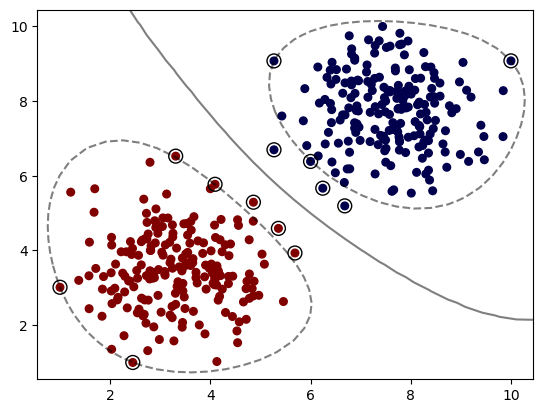

In [20]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

Compare the results of the "rbf" with the figures above that we used "kernel=linear".

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


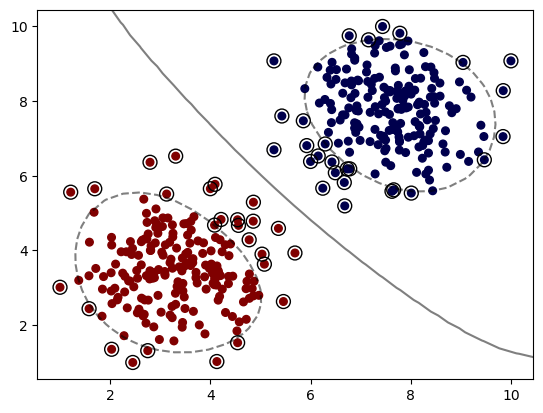

In [23]:
# with lower C (more points between margin and hyperplane)
model = SVC(kernel='rbf', C=0.1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### sigmoid

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


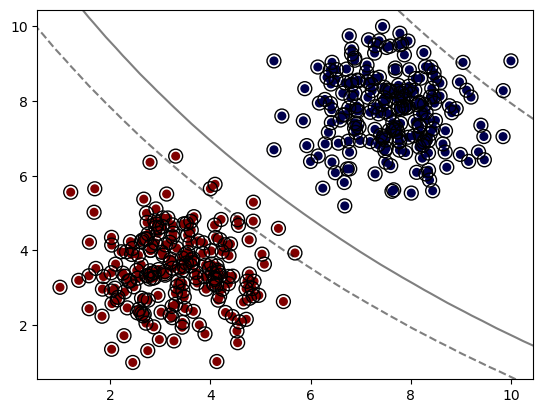

In [24]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

<div class="alert alert-block alert-success">
    
### <span style=" color:#eb346e">3. gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

- if gamma='scale' (default) is passed then it uses
- 1 / (n_features * X.var()) as value of gamma,
- if 'auto', uses 1 / n_features.

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


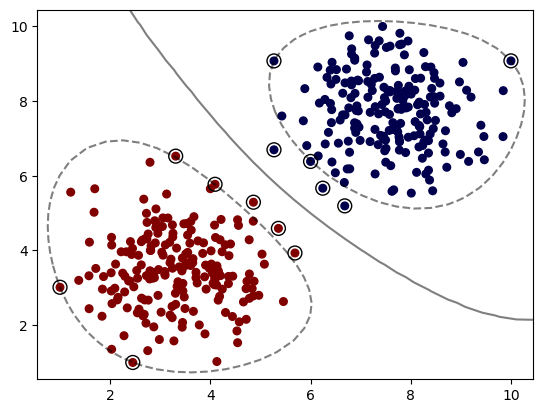

In [27]:
# default value for gamma is "sclae"
model = SVC(kernel='rbf', C=1, gamma="scale")
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


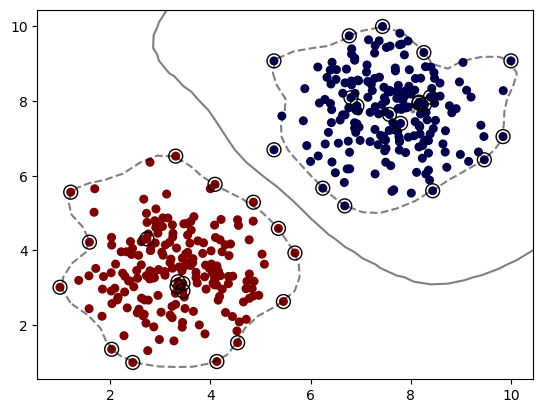

In [30]:
# gamma as auto
model = SVC(kernel='rbf', C=1, gamma="auto")
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


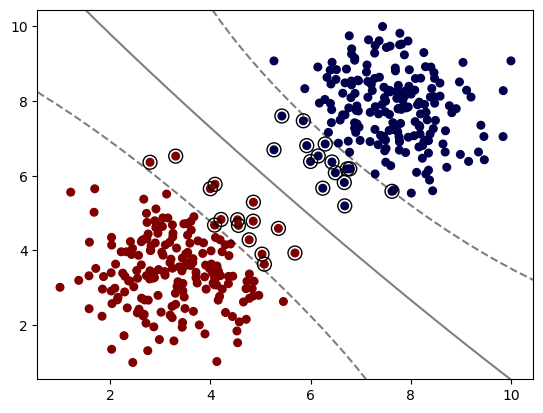

In [29]:
# gamma as a float value
model = SVC(kernel='rbf', C=1, gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


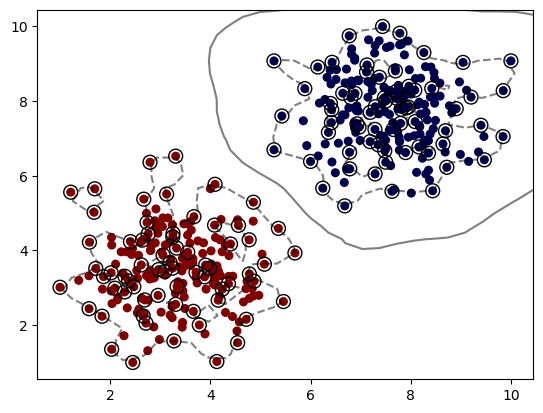

In [31]:
# larger gamma value can cause overfitting

model = SVC(kernel='rbf', C=1, gamma=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

<div class="alert alert-block alert-success">
    
### <span style=" color:#eb346e">4. Degree (poly kernels only)

Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


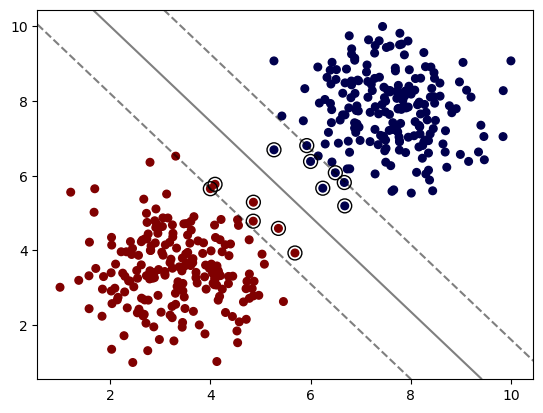

In [34]:
model = SVC(kernel='poly', C=1, degree=1) # "degree=1" looks like linear 
model.fit(X, y)
plot_svm_boundary(model,X,y)

**We can use the degree and C parameters to reduce each other's effects. As C decreases (goes to zero), the number of points within the margin increases. If we increase degree at the same time, the number of points will decrease again.**
(More points mean more bias and less variance.)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


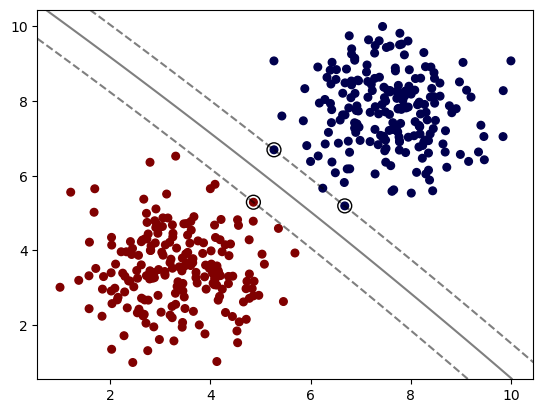

In [35]:
# higher degree
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


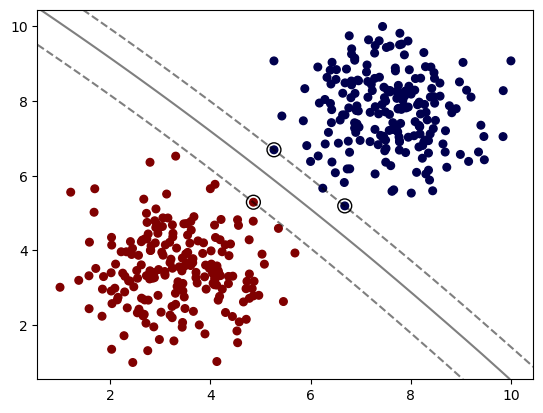

In [39]:
# lower C (more points) but higher degree
model = SVC(kernel='poly', C=0.01,degree=4) 
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw that the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [42]:
# Note again we didn't split Train|Test
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

This is more to review the grid search process, recall in a real situation, we will perform a train|test split and get final evaluation metrics.

In [43]:
# 100% accuracy (as expected)
grid.best_score_

1.0

In [44]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


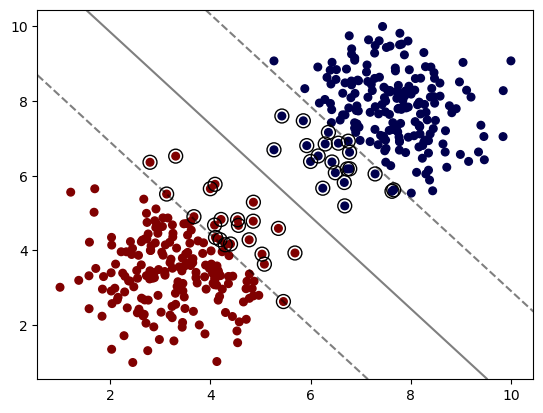

In [46]:
# According to the best parameters 

model = SVC(kernel='linear', C=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)